Imports

In [3]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.set_option('display.max_colwidth', 4000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Perspective Score

In [5]:
per_score = pd.read_csv(".\\Perspective_score_Anti_Racism_Post.csv")
per_score.head()

,Anti_Racism_post,Toxicity,Severe_Toxicity,Profanity,Insult,Threat,Identity_Attack
0,पुलवामा में 40 जवानों की शहादत की खबर के तीन घंटे बाद भी ‘प्राइम टाइम मिनिस्टर’ फिल्म शूटिंग करते रहे।\n\nदेश के दिल व शहीदों के घरों में दर्द का दरिया उमड़ा था और वे हँसते हुए दरिया में फोटोशूट पर थे।\n\n#PhotoShootSarkarTranslate Tweet,0.285497,0.013350,0.079348,0.249285,0.065616,0.092455
1,Okay so NASA said today was the only day a broom can stand up on its own because of the gravitational pull...I didn’t believe it at first but OMG! 0:168.6M views,0.104362,0.004292,0.047424,0.024382,0.010421,0.015154
2,"At a meeting in Florida today, everyone was asking why aren’t the Republicans up in arms & fighting over the fact that the Democrats stole the rigged presidential election? Especially in the Senate, they said, where you helped 8 Senators win their races. How quickly they forget! This claim about election fraud is disputed",0.155456,0.003262,0.016753,0.062151,0.015429,0.036363
3,"Mexico was just ranked the second deadliest country in the world, after only Syria. Drug trade is largely the cause. We will BUILD THE WALL!",0.377512,0.023077,0.076762,0.167734,0.135154,0.381799
4,Republicans want you to believe we can afford trillions in tax cuts for billionaires but only a one time $600 check for the people. Meanwhile Canada has given $2k/month since the pandemic started.\n\nBecause they care about their people. Republicans don’t.,0.071337,0.001211,0.012278,0.030816,0.006071,0.016963


In [6]:
per_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Toxicity,3537.0,0.232543,0.187586,0.008294,0.091122,0.184591,0.335877,0.960691
Severe_Toxicity,3537.0,0.024724,0.072388,0.000536,0.002413,0.004921,0.013156,0.614766
Profanity,3537.0,0.093234,0.145011,0.009443,0.018461,0.030139,0.092280,0.915133
Insult,3537.0,0.166036,0.190884,0.006772,0.026960,0.072067,0.252060,0.891089
Threat,3537.0,0.037155,0.073823,0.005900,0.008686,0.011405,0.026307,0.603255
Identity_Attack,3537.0,0.085221,0.120656,0.001693,0.011173,0.028629,0.102216,0.622012


Text(0, 0.5, 'Frequency')

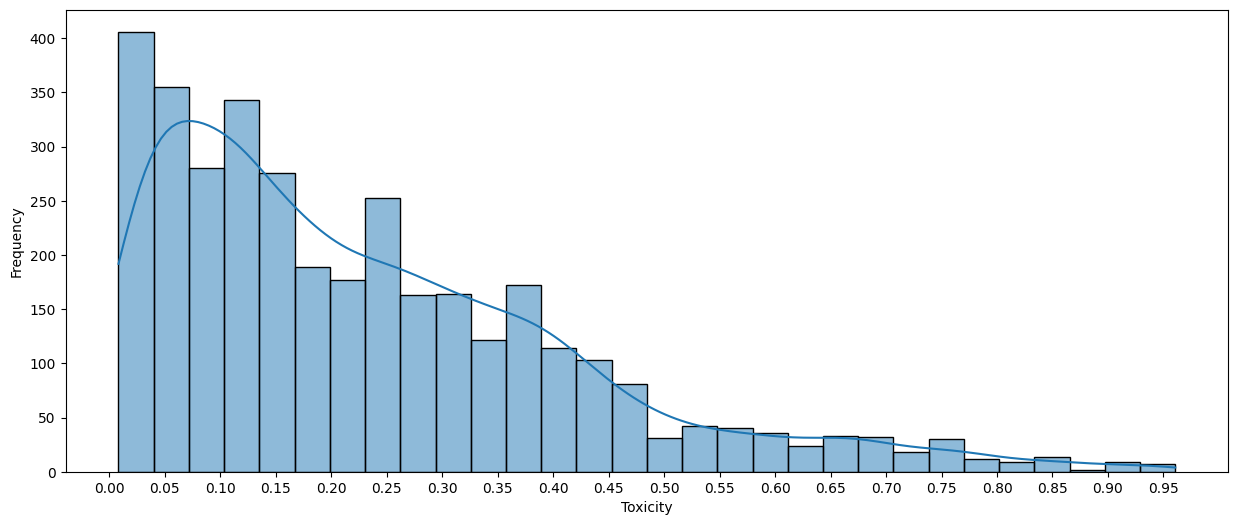

In [7]:
plt.figure(figsize=(15, 6))
sns.histplot(data = per_score, x = 'Toxicity', kde=True)
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('Toxicity')
plt.ylabel('Frequency')

<Axes: xlabel='Severe_Toxicity', ylabel='Count'>

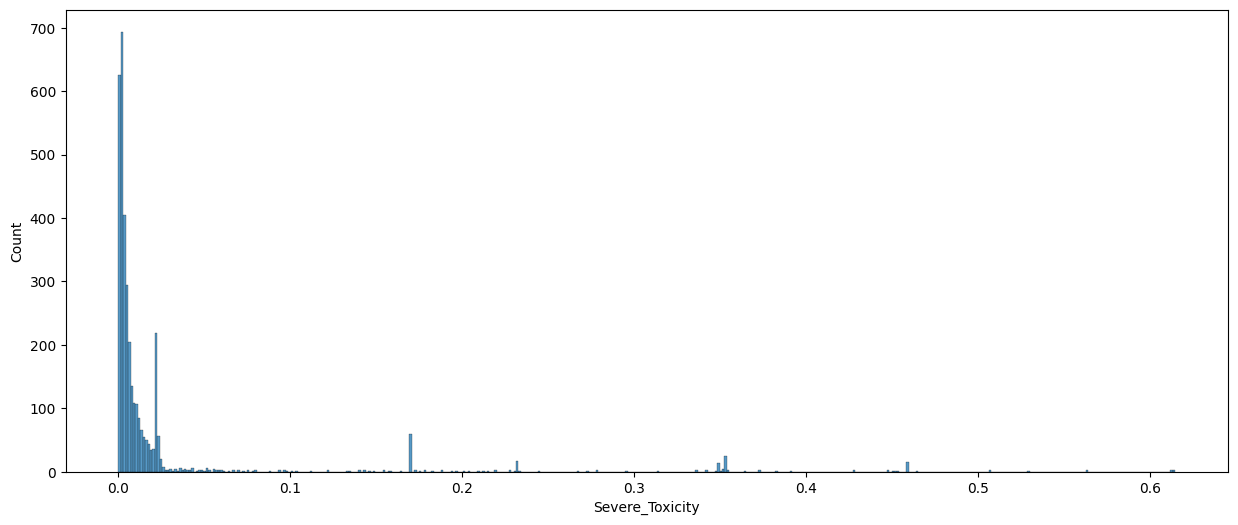

In [8]:
plt.figure(figsize=(15, 6))
sns.histplot(data = per_score, x = 'Severe_Toxicity')

In [9]:
df1 = per_score[(per_score['Toxicity'] >= 0.35)].sort_values(by='Toxicity')
# df1 = random_sample[(per_score['Toxicity'] >= 0.5) & (per_score['Toxicity'] <= 0.6)].sort_values(by='Toxicity')
print(df1.shape)

(816, 7)


In [10]:
lowest_tox = per_score['Toxicity'].min()
highest_tox = per_score['Toxicity'].max()
print(lowest_tox)
print(highest_tox)

0.008293601
0.96069145


In [11]:
slab_diff = 0.04

range_tox = np.linspace(lowest_tox, highest_tox + slab_diff, int((highest_tox - lowest_tox) / slab_diff) + 1)

slab_cnt = pd.DataFrame({
    'Toxicity_Lower': range_tox[:-1],
    'Toxicity_Upper': range_tox[1:],
    'Count': 0
})

for index, row in per_score.iterrows():
    for i, slab in slab_cnt.iterrows():
        if row['Toxicity'] >= slab['Toxicity_Lower'] and row['Toxicity'] < slab['Toxicity_Upper']:
            slab_cnt.at[i, 'Count'] += 1
            break

In [12]:
slab_cnt.head(30)

,Toxicity_Lower,Toxicity_Upper,Count
0,0.008294,0.051441,582
1,0.051441,0.094589,337
2,0.094589,0.137737,480
3,0.137737,0.180885,351
4,0.180885,0.224032,252
5,0.224032,0.267180,291
6,0.267180,0.310328,234
7,0.310328,0.353475,200
8,0.353475,0.396623,190
9,0.396623,0.439771,169


In [13]:
(slab_cnt['Count'] == 0).sum()

0

In [14]:
slab_cnt['Count'].sum()

3537

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '0.008293601'),
  Text(1, 0, '0.051441333565217386'),
  Text(2, 0, '0.09458906613043477'),
  Text(3, 0, '0.13773679869565217'),
  Text(4, 0, '0.18088453126086956'),
  Text(5, 0, '0.22403226382608696'),
  Text(6, 0, '0.2671799963913043'),
  Text(7, 0, '0.3103277289565217'),
  Text(8, 0, '0.3534754615217391'),
  Text(9, 0, '0.39662319408695645'),
  Text(10, 0, '0.4397709266521739'),
  Text(11, 0, '0.48291865921739124'),
  Text(12, 0, '0.5260663917826086'),
  Text(13, 0, '0.569214124347826'),
  Text(14, 0, '0.6123618569130435'),
  Text(15, 0, '0.6555095894782608'),
  Text(16, 0, '0.6986573220434782'),
  Text(17, 0, '0.7418050546086956'),
  Text(18, 0, '0.7849527871739129'),
  Text(19, 0, '0.8281005197391303'),
  Text(20, 0, '0.8712482523043478'),
  Text(21, 0, '0.9143959848695651'),
  Text(22, 0, '0.9575437174347825')])

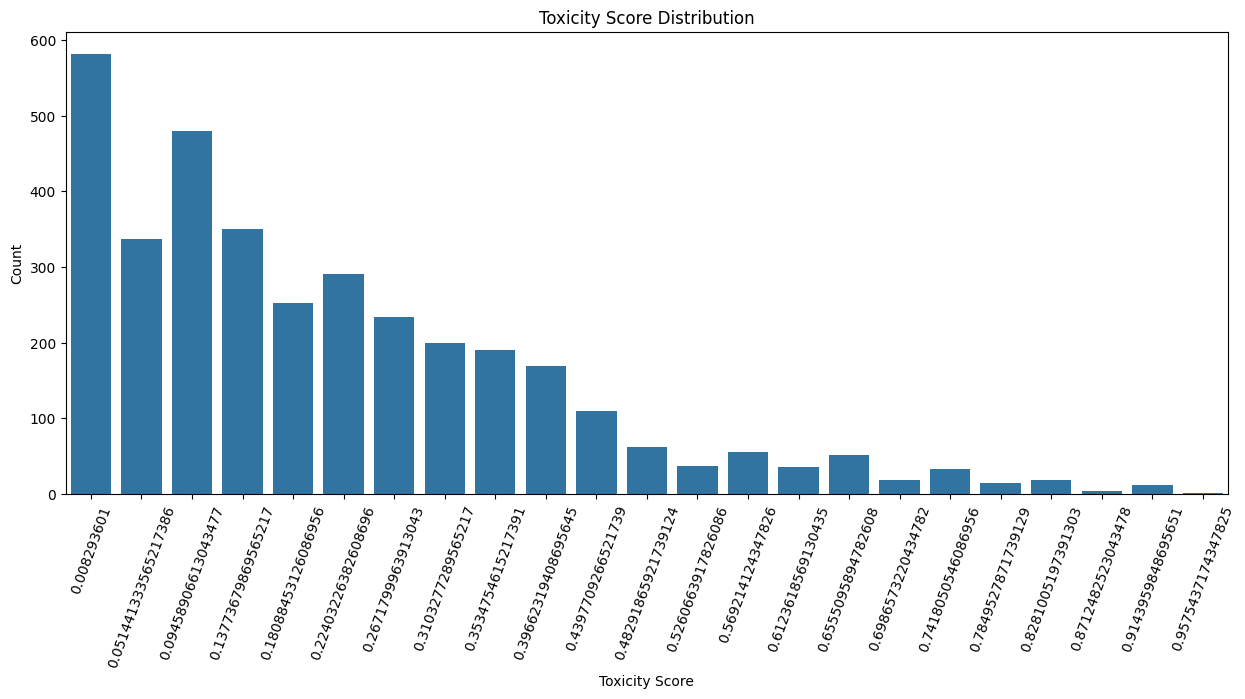

In [15]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='Toxicity_Lower', y='Count', data=slab_cnt)
# plt.hist(data = slab_cnt, x = 'Count', bins=30, align='left', color='blue')

# ax.set_xlim([0,1])
# ax.set_ylim([0, 420])
# ax.set_xticks(np.linspace(0, 1, 30))
# ax.set_yticks(np.linspace(0, 350, 10))

plt.title('Toxicity Score Distribution')
plt.xlabel('Toxicity Score')
plt.ylabel('Count')
plt.xticks(rotation=70)

In [16]:
per_score['Toxicity_cat'] = pd.cut(per_score['Toxicity'], bins=np.arange(0, 1.04, 0.04), labels=False)

In [17]:
per_score.sort_values(by='Toxicity', inplace = True)
per_score = per_score.iloc[:-4]

In [ ]:
per_score.iloc[-30:]

In [19]:
per_score.shape

(3537, 8)

In [ ]:
per_score['Toxicity_cat'].value_counts(sort = False)

In [21]:
per_score.loc[per_score['Toxicity_cat']>21, 'Toxicity_cat'] = 22

In [22]:
per_score['Toxicity_cat'].value_counts(sort = False)

Toxicity_cat
0.0     406
1.0     398
2.0     513
3.0     276
4.0     278
5.0     249
6.0     228
7.0     206
8.0     174
9.0     225
10.0    137
11.0     96
12.0     54
13.0     46
14.0     49
15.0     29
16.0     40
17.0     42
18.0     24
19.0     26
20.0     10
21.0     15
22.0     16
Name: count, dtype: int64

In [23]:
avg_severe_toxicity = per_score['Severe_Toxicity'].mean()
avg_toxicity = per_score['Toxicity'].mean()

Source: https://www.calculator.net/sample-size-calculator.html?type=1&cl=95&ci=5&pp=50&ps=3537&x=Calculate
Formula used: 
Confidence Level: 95%
Margin of Error: 5%
Population Proportion: 50 (Use 50% if not sure)
Population Size: 3537 (Leave blank if unlimited population size)

STRATIFIED_SAMPLE 1

In [24]:
sample_proportion = 360 / len(per_score)
stratified_sample1 = per_score.groupby('Toxicity_cat').apply(lambda x: x.sample(int(len(x) * sample_proportion), random_state=42)).reset_index(drop=True)

C:\Users\saskh\AppData\Local\Temp\ipykernel_16892\2986577675.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample1 = per_score.groupby('Toxicity_cat').apply(lambda x: x.sample(int(len(x) * sample_proportion), random_state=42)).reset_index(drop=True)


In [25]:
print(stratified_sample1.shape)
stratified_sample1['Toxicity_cat'].value_counts(sort = False)

(348, 8)


Toxicity_cat
0.0     41
1.0     40
2.0     52
3.0     28
4.0     28
5.0     25
6.0     23
7.0     20
8.0     17
9.0     22
10.0    13
11.0     9
12.0     5
13.0     4
14.0     4
15.0     2
16.0     4
17.0     4
18.0     2
19.0     2
20.0     1
21.0     1
22.0     1
Name: count, dtype: int64

In [26]:
stratified_sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Anti_Racism_post  348 non-null    object 
 1   Toxicity          348 non-null    float64
 2   Severe_Toxicity   348 non-null    float64
 3   Profanity         348 non-null    float64
 4   Insult            348 non-null    float64
 5   Threat            348 non-null    float64
 6   Identity_Attack   348 non-null    float64
 7   Toxicity_cat      348 non-null    float64
dtypes: float64(7), object(1)
memory usage: 21.9+ KB


In [27]:
# df1 = stratified_sample1[(stratified_sample1['Toxicity'] >= 0.2) & (stratified_sample1['Toxicity'] <= 0.25)].sort_values(by='Toxicity')
# df1 = stratified_sample1[(stratified_sample1['Toxicity'] <= .25)].sort_values(by='Toxicity')
# df1 = stratified_sample1[(stratified_sample1['Toxicity_cat'] >= 0) & (stratified_sample1['Toxicity_cat'] <= 4)].sort_values(by='Toxicity')
df1 = stratified_sample1[(stratified_sample1['Toxicity_cat'] == 9)].sort_values(by='Toxicity')

print(df1.shape)
print(df1['Severe_Toxicity'].mean())

df1.head(400)

(22, 8)
0.01522425404090909


,Anti_Racism_post,Toxicity,Severe_Toxicity,Profanity,Insult,Threat,Identity_Attack,Toxicity_cat
274,Watching Governor Cuomo is a case study in chutzpah.Cuomo’s policies led to the unnecessary death of thousands.He presided over 20% of all the American deaths from the Chinese Virus.His answer:attack Trump. Of course anti-Trump media applauds Cuomo while he lies.,0.360951,0.009117,0.037904,0.338892,0.040984,0.066587,9.0
289,"Replying to @realDonaldTrump The #TrumpTapes will go down in infamy, showing a weak and ineffective 'president' trying to overturn the will of 81 million people who voted against him.",0.360951,0.006104,0.025771,0.384060,0.010318,0.017867,9.0
288,"So, Trump is a deadlier virus than COVID? Quote TweetRep. Matt Gaetz@RepMattGaetz · Oct 5, 2020President Trump won't have to recover from COVID. \n\nCOVID will have to recover from President Trump. #MAGA",0.360951,0.011902,0.024541,0.388520,0.014739,0.035847,9.0
287,"Trump is lying a lot in his speech that's billed as a White House event but is just a campaign rally. One example: He claimed that the coronavirus is disappearing as he is still infected with the virus. Trump is lying about: Biden, Democrats, COVID, his achievements, and more.",0.360951,0.007286,0.060951,0.342037,0.008764,0.043839,9.0
285,"Some liberals are so spooked that they think Trump denying the virus, telling everyone we’ve turned the corner, mocked mask wearing, and then getting the virus after failing to protect the country could all somehow be good for his election. The world is crazy. It’s not that crazy",0.360951,0.008850,0.112304,0.348603,0.008919,0.080047,9.0
295,Gets under my skin when they call it the China virus.,0.360951,0.018385,0.129038,0.188530,0.024753,0.381799,9.0
290,"#Bobwoodward took down a lying, immoral, unfit President with tapes. Looks like he’s going to do it again. \n\nON TAPE— on FEBRUARY 7– BEFORE the first COVID case in the USA. #TrumpKnew it was DEADLY, and INTENTIONALLY lied about it to us and did NOTHING. 200,000 DEAD. Quote TweetCNN Politics@CNNPolitics · Sep 9, 2020In new tapes, President Trump admits to Bob Woodward he concealed critical details he knew about the coronavirus. ""I wanted to always play it down."" https://cnn.it/3bFjswx",0.368677,0.009918,0.024473,0.417675,0.009515,0.012541,9.0
284,"Trump has had the Covid-19 relief bill for days. He failed to sign it as of last night, allowing unemployment benefits to expire for millions of Americans. \n\nHis negligence and denials allowed the virus to spread. Now his incompetence and ego are worsening the economic crisis.",0.370732,0.005150,0.020169,0.402434,0.007457,0.018269,9.0
294,"Fake news! Not Chinese language!! Not even Chinese police uniform!!! This is sheer propaganda against China, trying to sabotage relations between China & muslim countryies. There’s no ‘East Turkistan’ in China. Only terrorists & their sympathizers call Xinjiang ‘East Turkistan’. https://twitter.com/AnilaKhan1995/status/1079867200633221120… This Tweet is unavailable.",0.374586,0.018320,0.084844,0.232375,0.034768,0.381799,9.0
281,"When President-elect Biden is sworn in, we’ll have to ask the question “Did Emily Murphy’s negligence result in anyone dying?” And if the answer is yes, Emily should spend the rest of her life in prison. This is not a game. Emily has no right to stall. Shame on @GSAEmily forever.",0.375766,0.010910,0.064458,0.345482,0.053008,0.025404,9.0


In [28]:
sample1_avg_severe_toxicity = stratified_sample1['Severe_Toxicity'].mean()
sample1_avg_toxicity = stratified_sample1['Toxicity'].mean()

In [29]:
print(abs(avg_severe_toxicity - sample1_avg_severe_toxicity) / avg_severe_toxicity * 100)
print(abs(avg_toxicity - sample1_avg_toxicity) / avg_toxicity * 100)

12.070468236875652
2.9899752213170885


STRATIFIED_SAMPLE 2

In [30]:
sample_proportion = 360 / len(per_score)
stratified_sample2 = per_score.groupby('Toxicity_cat').apply(lambda x: x.sample(int(len(x) * sample_proportion), random_state=10)).reset_index(drop=True)

C:\Users\saskh\AppData\Local\Temp\ipykernel_16892\3437387389.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample2 = per_score.groupby('Toxicity_cat').apply(lambda x: x.sample(int(len(x) * sample_proportion), random_state=10)).reset_index(drop=True)


In [31]:
print(stratified_sample2.shape)
stratified_sample2['Toxicity_cat'].value_counts(sort = False)

(348, 8)


Toxicity_cat
0.0     41
1.0     40
2.0     52
3.0     28
4.0     28
5.0     25
6.0     23
7.0     20
8.0     17
9.0     22
10.0    13
11.0     9
12.0     5
13.0     4
14.0     4
15.0     2
16.0     4
17.0     4
18.0     2
19.0     2
20.0     1
21.0     1
22.0     1
Name: count, dtype: int64

In [ ]:
# df2 = stratified_sample2[(stratified_sample2['Toxicity'] >= 0.2) & (stratified_sample2['Toxicity'] <= 0.25)].sort_values(by='Toxicity')
# df2 = stratified_sample2[(stratified_sample2['Toxicity'] <= .25)].sort_values(by='Toxicity')
# df2 = stratified_sample2[(stratified_sample2['Toxicity_cat'] >= 12) & (stratified_sample2['Toxicity_cat'] <= 15)].sort_values(by='Toxicity')
df2 = stratified_sample2[(stratified_sample2['Toxicity_cat'] >= 0)].sort_values(by='Toxicity')

print(df2.shape)
print(df2['Severe_Toxicity'].mean())

df2.head(400)

In [33]:
sample2_avg_severe_toxicity = stratified_sample2['Severe_Toxicity'].mean()
sample2_avg_toxicity = stratified_sample2['Toxicity'].mean()

In [34]:
print(abs(avg_severe_toxicity - sample2_avg_severe_toxicity) / avg_severe_toxicity * 100)
print(abs(avg_toxicity - sample2_avg_toxicity) / avg_toxicity * 100)

12.89504031677747
3.5738613806483173


Text(0, 0.5, 'Frequency')

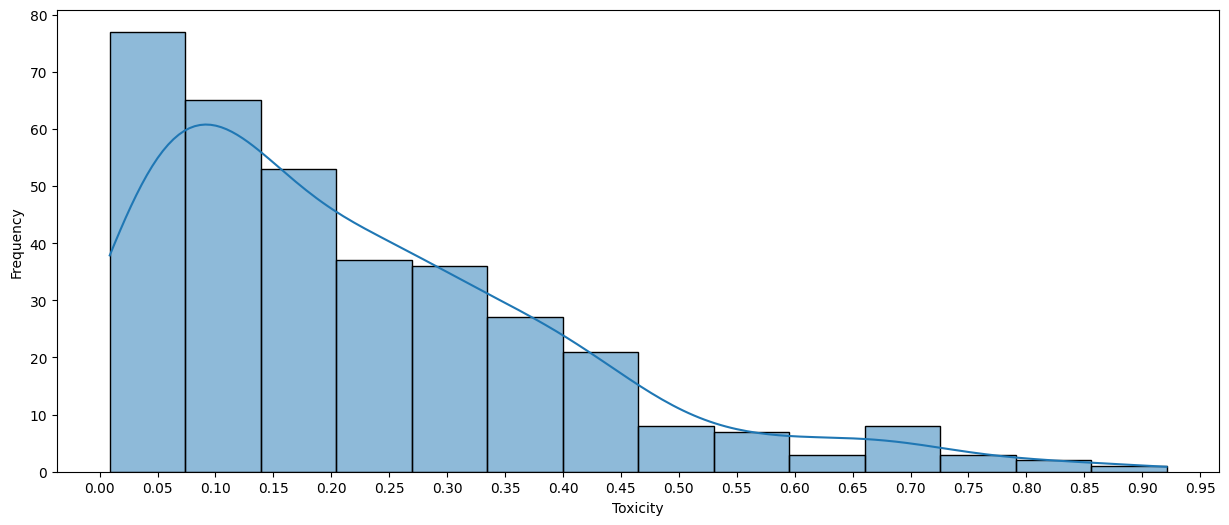

In [35]:
plt.figure(figsize=(15, 6))
sns.histplot(data = stratified_sample2, x = 'Toxicity', kde=True)
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('Toxicity')
plt.ylabel('Frequency')

In [36]:
sample2_toxicity = stratified_sample1['Toxicity'].tolist()

In [37]:
print(sample2_toxicity)

[0.01859777, 0.027677942, 0.030506283, 0.013822667, 0.015079274, 0.018974753, 0.02308189, 0.034748793, 0.029445656, 0.030859824, 0.037105743, 0.018974753, 0.03192045, 0.038519915, 0.024260364, 0.025792383, 0.025320992, 0.028856417, 0.010555492, 0.026263772, 0.01646154, 0.039935954, 0.03192045, 0.028974265, 0.031684756, 0.036634352, 0.019854378, 0.026970858, 0.024849601, 0.011560776, 0.022964042, 0.02035702, 0.008293601, 0.022374803, 0.029917045, 0.030859824, 0.016587202, 0.03781283, 0.019603057, 0.034277402, 0.032627538, 0.05304765, 0.079250954, 0.041915078, 0.054284602, 0.045625936, 0.045131154, 0.075294, 0.045625936, 0.056016337, 0.04735767, 0.04067813, 0.07687678, 0.04315203, 0.044141594, 0.04785245, 0.04216247, 0.075294, 0.06104896, 0.05651112, 0.07608539, 0.044636376, 0.040925518, 0.077668175, 0.057005897, 0.040183347, 0.07845957, 0.04686289, 0.056758508, 0.058490243, 0.046120718, 0.07845957, 0.07608539, 0.063423134, 0.04315203, 0.06500591, 0.04686289, 0.04686289, 0.058737632, 0.0

STRATIFIED_SAMPLE 3

In [38]:
sample_proportion = 360 / len(per_score)
stratified_sample3 = per_score.groupby('Toxicity_cat').apply(lambda x: x.sample(int(len(x) * sample_proportion), random_state=100)).reset_index(drop=True)

C:\Users\saskh\AppData\Local\Temp\ipykernel_16892\1178759779.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample3 = per_score.groupby('Toxicity_cat').apply(lambda x: x.sample(int(len(x) * sample_proportion), random_state=100)).reset_index(drop=True)


In [ ]:
# df2 = stratified_sample2[(stratified_sample2['Toxicity'] >= 0.2) & (stratified_sample2['Toxicity'] <= 0.25)].sort_values(by='Toxicity')
# df2 = stratified_sample2[(stratified_sample2['Toxicity'] <= .25)].sort_values(by='Toxicity')
# df3 = stratified_sample3[(stratified_sample3['Toxicity_cat'] >= ) & (stratified_sample3['Toxicity_cat'] <= 15)].sort_values(by='Toxicity')
df3 = stratified_sample3[(stratified_sample3['Toxicity_cat'] == 9)].sort_values(by='Toxicity')

print(df3.shape)
print(df3['Severe_Toxicity'].mean())

df3.head(400)

Checking no. of comments above the threshold value

In [40]:
(per_score['Toxicity'] >= 0.36).sum()

809

In [41]:
filtered_df = per_score[per_score['Toxicity'] >= 0.36]

In [42]:
filtered_df.head()

,Anti_Racism_post,Toxicity,Severe_Toxicity,Profanity,Insult,Threat,Identity_Attack,Toxicity_cat
875,"Let me get this straight:\n\nChina, the country that locks Uighur Muslims in concentration camps, has the nerve to call the United States “racist” for labeling COVID-19 the Chinese Virus?\n\nAnd the mainstream media is parroting their talking points\n\nHow does that make ANY sense?\n\n",0.360437,0.016125,0.099306,0.195005,0.013476,0.378048,9.0
1792,.@LucyFlores tells me she doesn’t consider what Biden did to be “sexual harassment” — but also says to Google “creepy Uncle Joe” and that will show you she’s talking about @KasieDC,0.360437,0.011673,0.124631,0.232375,0.012959,0.035332,9.0
2432,What an absolute farce this TV debate will be:\n\n No Brexit voice \n Two politicians wanting to tie us to EU rules\n Likely to be on pro-EU BBC\n Panel of business leaders (how about a panel of Brexiteers?)\n\nShambles!,0.360437,0.011978,0.156360,0.269578,0.012907,0.088319,9.0
771,Swiss cheese - not racist\n\nItalian sausage - not racist\n\nBrazilian wax - not racist\n\nBelgian waffle - not racist\n\nIrish coffee - not racist\n\nSpanish flu - not racist \n\nChinese virus - NOT RACIST,0.360437,0.023077,0.165899,0.153432,0.011379,0.321843,9.0
3366,"I saved at least 8 Republican Senators, including Mitch, from losing in the last Rigged (for President) Election. Now they (almost all) sit back and watch me fight against a crooked and vicious foe, the Radical Left Democrats. I will NEVER FORGET! This claim about election fraud is disputed",0.360437,0.007744,0.043917,0.378466,0.009075,0.059766,9.0


Text(0, 0.5, 'Frequency')

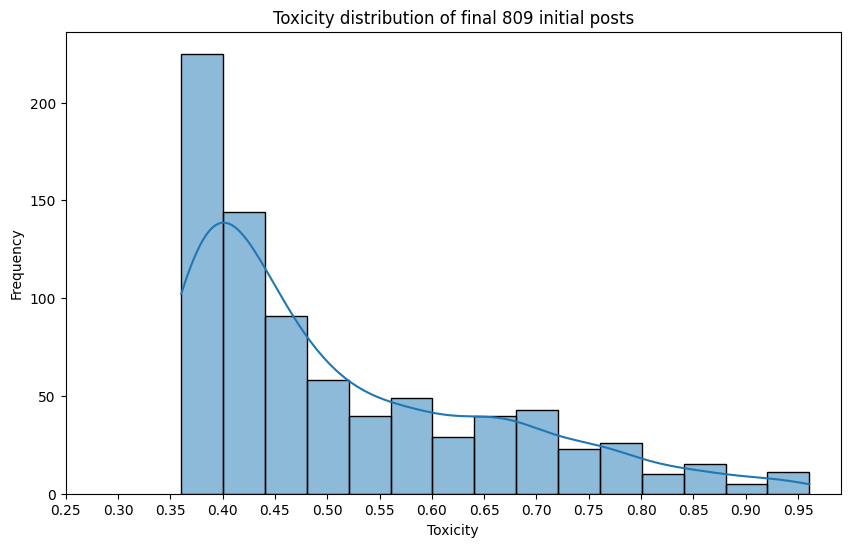

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data = filtered_df, x = 'Toxicity', kde=True)
plt.xticks(np.arange(0.25, 1, 0.05))
plt.title('Toxicity distribution of final 809 initial posts')
plt.xlabel('Toxicity')
plt.ylabel('Frequency')

In [44]:
filtered_df1 = filtered_df[::2]
filtered_df2 = filtered_df[1::2]

In [45]:
filtered_df1.to_csv('filtered_df1.csv', index=False)
filtered_df2.to_csv('filtered_df2.csv', index=False)

Analysis

In [46]:
filtered_df1_ant = pd.read_csv('.\\filtered_df1_ant.csv')

In [47]:
filtered_df1_ant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Anti_Racism_post             405 non-null    object 
 1   Toxicity                     405 non-null    float64
 2   Severe_Toxicity              405 non-null    float64
 3   Profanity                    405 non-null    float64
 4   Insult                       405 non-null    float64
 5   Threat                       405 non-null    float64
 6   Identity_Attack              405 non-null    float64
 7   Toxicity_cat                 405 non-null    int64  
 8   Binary_classfication(Atif)   405 non-null    int64  
 9   Binary_classfication(Abdul)  405 non-null    int64  
 10  final                        402 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 34.9+ KB


In [48]:
difference1 = filtered_df1_ant[abs(filtered_df1_ant['Binary_classfication(Atif)'] - filtered_df1_ant['Binary_classfication(Abdul)']) == 1]

In [ ]:
print(difference1.shape)
difference1.head(100)

In [50]:
difference1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1 to 360
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Anti_Racism_post             66 non-null     object 
 1   Toxicity                     66 non-null     float64
 2   Severe_Toxicity              66 non-null     float64
 3   Profanity                    66 non-null     float64
 4   Insult                       66 non-null     float64
 5   Threat                       66 non-null     float64
 6   Identity_Attack              66 non-null     float64
 7   Toxicity_cat                 66 non-null     int64  
 8   Binary_classfication(Atif)   66 non-null     int64  
 9   Binary_classfication(Abdul)  66 non-null     int64  
 10  final                        63 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 6.2+ KB


In [51]:
difference1.to_csv('difference1.csv', index=False)

In [52]:
filtered_df2_ant = pd.read_csv('.\\filtered_df2_ant.csv')

In [53]:
filtered_df2_ant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Anti_Racism_post                 404 non-null    object 
 1   Toxicity                         404 non-null    float64
 2   Severe_Toxicity                  404 non-null    float64
 3   Profanity                        404 non-null    float64
 4   Insult                           404 non-null    float64
 5   Threat                           404 non-null    float64
 6   Identity_Attack                  404 non-null    float64
 7   Toxicity_cat                     404 non-null    int64  
 8   Binary_classfication(Shivangee)  396 non-null    float64
 9   Binary_classfication(Ram)        396 non-null    float64
 10  remark                           4 non-null      object 
 11  final                            393 non-null    float64
dtypes: float64(9), int64(1

In [54]:
difference2 = filtered_df2_ant[abs(filtered_df2_ant['Binary_classfication(Shivangee)'] - filtered_df2_ant['Binary_classfication(Ram)']) == 1]

In [ ]:
print(difference2.shape)
difference2.head()

In [56]:
difference2.to_csv('difference2.csv', index = False)

Final labels before Sakti sir labels

In [57]:
difference1 = pd.read_csv('./difference1.csv')

In [58]:
#Abdul and Atif dataset

filtered_df1_ant['final'] = np.nan
filtered_df1_ant['diff'] = np.abs(filtered_df1_ant['Binary_classfication(Atif)'] - filtered_df1_ant['Binary_classfication(Abdul)'])

mask = filtered_df1_ant['diff'] == 1
filtered_df1_ant.loc[mask, 'final'] = difference1['Final'].values

mask = filtered_df1_ant['diff'] == 0
filtered_df1_ant.loc[mask, 'final'] = filtered_df1_ant.loc[mask, 'Binary_classfication(Atif)']

filtered_df1_ant = filtered_df1_ant.drop('diff', axis=1)

KeyError: 'Final'

In [ ]:
filtered_df1_ant.to_csv('filtered_df1_ant.csv', index = False)

In [ ]:
filtered_df1_ant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Anti_Racism_post             405 non-null    object 
 1   Toxicity                     405 non-null    float64
 2   Severe_Toxicity              405 non-null    float64
 3   Profanity                    405 non-null    float64
 4   Insult                       405 non-null    float64
 5   Threat                       405 non-null    float64
 6   Identity_Attack              405 non-null    float64
 7   Toxicity_cat                 405 non-null    int64  
 8   Binary_classfication(Atif)   405 non-null    int64  
 9   Binary_classfication(Abdul)  405 non-null    int64  
 10  final                        402 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 34.9+ KB


In [ ]:
filtered_df2_ant = pd.read_csv('.\\filtered_df2_ant.csv')

In [ ]:
#Ram and Shivangee dataset
filtered_df2_ant['final'] = np.where(np.abs(filtered_df2_ant['Binary_classfication(Ram)'] - filtered_df2_ant['Binary_classfication(Shivangee)']) == 1, filtered_df2_ant['resolve'].where(pd.notna(filtered_df2_ant['resolve'])), np.nan)
filtered_df2_ant.loc[np.abs(filtered_df2_ant['Binary_classfication(Ram)'] - filtered_df2_ant['Binary_classfication(Shivangee)']) == 0, 'final'] = filtered_df2_ant['Binary_classfication(Ram)']

filtered_df2_ant = filtered_df2_ant.drop(['resolve', 'agreement'], axis=1)

In [ ]:
filtered_df2_ant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Anti_Racism_post                 404 non-null    object 
 1   Toxicity                         404 non-null    float64
 2   Severe_Toxicity                  404 non-null    float64
 3   Profanity                        404 non-null    float64
 4   Insult                           404 non-null    float64
 5   Threat                           404 non-null    float64
 6   Identity_Attack                  404 non-null    float64
 7   Toxicity_cat                     404 non-null    int64  
 8   Binary_classfication(Shivangee)  396 non-null    float64
 9   Binary_classfication(Ram)        396 non-null    float64
 10  remark                           4 non-null      object 
 11  final                            393 non-null    float64
dtypes: float64(9), int64(1

In [ ]:
filtered_df2_ant.to_csv('filtered_df2_ant.csv', index = False)

In [ ]:
filtered_df1_ant_2 = pd.read_csv('./filtered_df1_ant_2.csv')

In [ ]:
difference = filtered_df1_ant_2[abs(filtered_df1_ant_2['Binary_classfication(Atif)'] - filtered_df1_ant_2['Binary_classfication(Abdul)']) == 1]

In [ ]:
difference.shape

(60, 13)

In [ ]:
difference['final'].isna().sum()

0

In [ ]:
difference.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 404
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Anti_Racism_post               60 non-null     object 
 1   Toxicity                       60 non-null     float64
 2   Severe_Toxicity                60 non-null     float64
 3   Profanity                      60 non-null     float64
 4   Insult                         60 non-null     float64
 5   Threat                         60 non-null     float64
 6   Identity_Attack                60 non-null     float64
 7   Toxicity_cat                   60 non-null     int64  
 8   Binary_classfication(Atif)     60 non-null     float64
 9   special categorization(Atif)   7 non-null      float64
 10  Binary_classfication(Abdul)    60 non-null     float64
 11  special categorization(Abdul)  8 non-null      float64
 12  final                          60 non-null     object 
d